In [66]:
import wisps
import numpy as np
import pandas as pd
import splat
import matplotlib.pyplot as plt
import wisps.simulations as wispsim

In [3]:
specs=pd.read_pickle(wisps.OUTPUT_FILES+'/l_t_dwarfs.pkl')

In [67]:
def classify(s):
    s.normalize(waverange=[1.1,1.65])
    print (splat.classifyGravity(s.splat_spectrum,plot=False, yrange=[0.0, 1.4]), s.spectral_type)

In [68]:
p=specs.apply(classify)

VL-G L1.0
FLD-G L1.0
VL-G M8.0
FLD-G L1.0
VL-G L1.0
VL-G L4.0
Spectral type could not be determined from indices
 T3.0
Spectral type could not be determined from indices
 T9.0
VL-G T0.0
INT-G L0.0
Spectral type could not be determined from indices
 T4.0
INT-G L1.0
Spectral type could not be determined from indices
 T7.0
VL-G L8.0
Spectral type could not be determined from indices
 T1.0
Spectral type could not be determined from indices
 T4.0
FLD-G L1.0
FLD-G L4.0
Spectral type could not be determined from indices
 T4.0
FLD-G L1.0
Spectral type could not be determined from indices
 T6.0


In [60]:
df=wisps.datasets['candidates']
df=df[df.spt.apply(splat.typeToNum)>19.0]

In [69]:
rels=wispsim.POLYNOMIAL_RELATIONS

In [98]:
import splat.empirical as spe
def absolute_mag_dupuy(spt, filt):
    #use the uncertainty in dupuy relation 
    val, unc=spe.typeToMag(spt,filt,set='dupuy')
    return np.random.normal(val, unc)

In [85]:
pol=np.poly1d(np.flip([11.8526, 1.51647, -0.0165129, 0.00105023]))

In [88]:
m_h=np.linspace(-1, 10, 100)

In [90]:
pols=pol(m_h)

In [94]:
inv_pol=np.poly1d(np.polyfit(pols, m_h, 3))

In [100]:
hs=np.array([absolute_mag_dupuy(x, '2MASS H') for x in np.arange(20, 40)])

In [101]:
h_w2=inv_pol(hs)

Text(0, 0.5, '$M_H$')

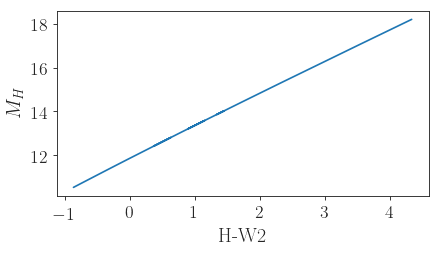

In [104]:
plt.plot(h_w2, hs)
plt.xlabel('H-W2')
plt.ylabel(r'$M_H$')

In [ ]:
w2s= hs-h_w2

${\displaystyle M=m-5\log _{10}(d_{\text{pc}})+5,}$

In [111]:
import numba
@numba.vectorize("float64(float64, float64)")
def app_mag(M, d):
    return M+5*np.log10(d)-5

In [133]:
mags=np.random.uniform(w2s[0],w2s[-1], 1000)
dists=np.random.uniform(10.0, 1500.0, 1000)
app= app_mag(mags, dists)
#app_mag(w2s[-1], 1500)

Text(0, 0.5, 'W2')

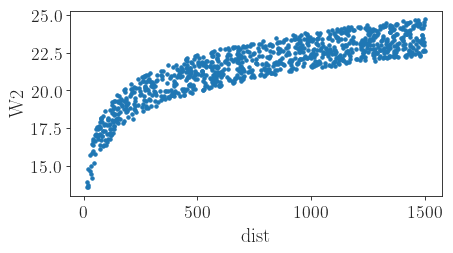

In [134]:
plt.plot(dists, app, '.')
plt.xlabel('dist')
plt.ylabel('W2')

In [1]:
import splat
import splat.empirical as spe
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

/Users/caganze/testsplat/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




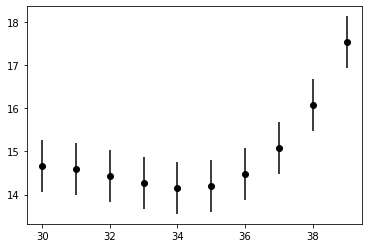

In [2]:
fig, ax=plt.subplots()
for a in np.arange(10, 40):
    ab=spe.typeToMag(a, 'MKO J', ref='kirkpatrick2021')
    
    ax.errorbar(a, ab[0], yerr=ab[-1], marker='o', c='k')

In [3]:
x, y=spe.typeToTeff(20, ref='mamajek')

In [4]:
def  spt_to_teff_kirkpatrick(spt):
    #change to array to vectorize
    spt=np.array(spt)
    size=0 #just a flag 
    if spt.size==1:
        spt=np.array([spt, spt])
        size=-1
    
    spt=np.array(spt).astype(float)
    #change to convetion L0=0
    spt=spt-20
    
    res= np.nan*(np.ones_like(spt))
    rms=79*(np.ones_like(spt))
    
    mask0= spt<0
    mask1= np.logical_and(spt>=0, spt<=8.75)
    mask2= np.logical_and(spt>=8.75, spt<=14.75)
    mask3= np.logical_and(spt>=14.75, spt<=22)
    
    #use mamjek for earlier
    res0, rms0=spe.typeToTeff(spt+20, ref='mamajek')
    res0=res0.value
    rms0=rms0.value
    res[mask0]= res0[mask0]
    rms[mask0]=rms[mask0]
    
    #use davy's for later
    res[mask1]= (2.2375e+03-1.4496e+02*spt+4.0301e+00*(spt**2))[mask1]
    rms[mask1]=134
    
    res[mask2]= (1.4379e+03-1.8309e+01*spt)[mask2]
    
    res[mask3]= (5.1413e+03-3.6865e+02*spt+6.7301e+00*(spt**2))[mask3]
    
    if size==-1:
        return res[0], rms[0]
    if size !=-1:
        return res, rms

def teff_to_spt_kirkpatrick(teff):
    
    #spectral type grid
    sp_grid=np.arange(10, 43)
    teff_grid, unc= np.vstack([list(spt_to_teff_kirkpatrick(x)) for x in sp_grid]).T
    
    
    #randomize
    rand_teffs= np.random.normal(teff_grid, unc, size=(10_000, len(unc)) ).flatten()
    rand_types= np.vstack([sp_grid for x in range(0, 10_000)]).flatten()
   
    #return interpolated value and uncertainties
    f=interp1d(rand_teffs, rand_types, assume_sorted = False, fill_value = np.nan, bounds_error=False)

    return f(teff)

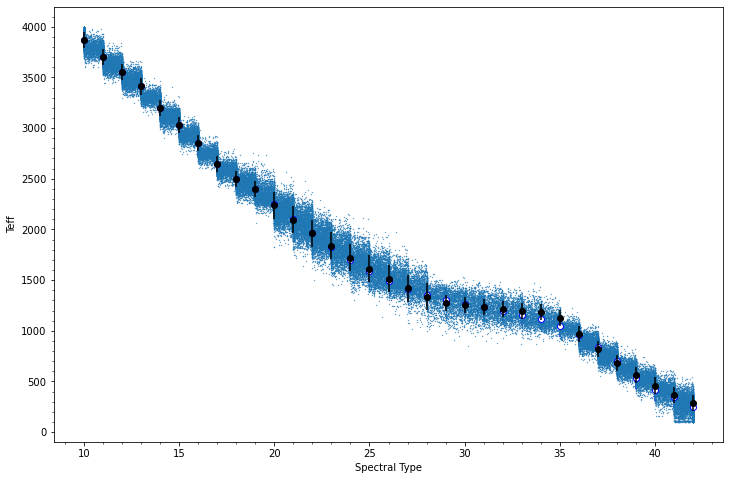

In [5]:
fig, ax=plt.subplots(figsize=(12, 8))
for a in np.arange(10, 43):
    ab=spt_to_teff_kirkpatrick(a)
    ax.errorbar(a, ab[0], yerr=ab[-1], marker='o', c='k')
    
    ab_m=spe.typeToTeff(float(a), ref='mamajek')
    
    ax.errorbar(a, ab_m[0].value, yerr=ab_m[-1].value, marker='o', color='blue', \
                mfc='white', zorder=1)
    
    ax.set(xlabel='Spectral Type', ylabel='Teff')
    ax.minorticks_on()

teffs=np.random.uniform(100, 4000, 10_0000)
ax.scatter( teff_to_spt_kirkpatrick(teffs), teffs, s=.1)

In [6]:
import popsims

In [7]:
d=popsims.make_systems()

In [8]:
d.columns

Index(['mass', 'age', 'temperature', 'luminosity', 'is_binary', 'spt',
       'prim_spt', 'sec_spt', 'pri_mass', 'sec_mass', 'prim_luminosity',
       'sec_luminosity', 'scale', 'scale_unc', 'scale_times_model'],
      dtype='object')

In [9]:
#recompute spts from kirkpatrick relations

spts=teff_to_spt_kirkpatrick( d.temperature)

(array([ 232.,  832.,  492.,  514.,  400.,  286.,  296.,  318.,  254.,
         249.,  235.,  259.,  223.,  307.,  324.,  382.,  962., 1824.,
        1358., 1394.,  937.]),
 array([15.        , 16.28571429, 17.57142857, 18.85714286, 20.14285714,
        21.42857143, 22.71428571, 24.        , 25.28571429, 26.57142857,
        27.85714286, 29.14285714, 30.42857143, 31.71428571, 33.        ,
        34.28571429, 35.57142857, 36.85714286, 38.14285714, 39.42857143,
        40.71428571, 42.        ]),
 <BarContainer object of 21 artists>)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


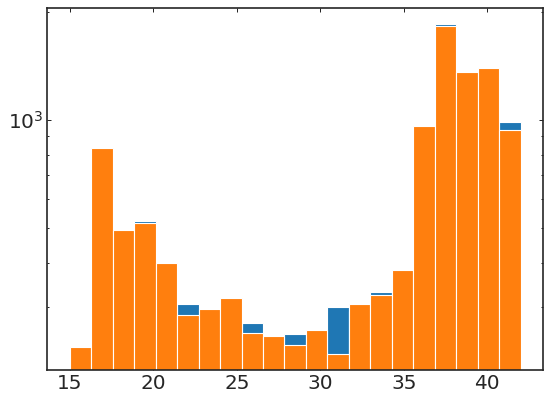

In [10]:
fig, ax=plt.subplots()
ax.hist(spts, bins='auto', log=True)
ax.hist(d.spt, bins='auto', log=True)

In [11]:
np.array([np.array(3)])[0]

3

In [12]:
  spt_to_teff_kirkpatrick(30)

(1254.8100000000002, 79.0)

In [13]:
spt_to_teff_kirkpatrick([20, 21])[0]

array([2237.5   , 2096.5701])

In [15]:
from popsims import galaxy

In [16]:
galaxy.Pointing

popsims.galaxy.Pointing